In [1]:
import pandas as pd
import anal_preprocess as ap
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#df = pd.read_csv('./student-mat.csv')
df = pd.read_csv('./diabetes.csv')
input_data = df.drop(columns=['Outcome'])
#df['grade'] = df['G1'].values + df['G2'].values + df['G3'].values 
#input_data = df.drop(columns=['grade'])

In [2]:
dp = ap.DataProcess(input_data, df)
dp.shapiro('Outcome')
dp.extract_numeric_categoy_cols()
numeric_data = dp.nemeric_check_cols()
dp.numeric_correlation_cols
dp.category_preprocess()
category_data, ctg_data = dp.category_tranformed_numeric()
if len(category_data) == 0:
    print('범주형 데이터 없음')
else:
    catg = ctg_data.columns
    ori_catg = input_data.columns
    intersection_catg = catg.intersection(ori_catg)
    catg_subplot = ctg_data[intersection_catg]

ShapiroResult(statistic=0.6025138190827578, pvalue=1.2926899738528582e-38)
본 결측치 체크는 연속형 변수에 대하여 진행합니다.
결측치 데이터 컬럼 없음!
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
이상치를 결측치로 대체한 후 KNN 방식으로 대체 ... 2차결측치 검증 진행
본 결측치 체크는 연속형 변수에 대하여 진행합니다.
결측치 데이터 컬럼 : 7개, ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 
Pregnancies                  4
Glucose                      0
BloodPressure                7
SkinThickness                1
Insulin                     34
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
dtype: int64
KNN 알고리즘 대체
결측치 대체 후 검정 결측치 컬럼갯수 : 0 
본 결측치 체크는 연속형 변수에 대하여 진행합니다.
결측치 데이터 컬럼 없음!


In [17]:
# 이상치를 boxplot으로 검증
#X = input_data
X = numeric_data
df_v1 = pd.melt(X, var_name='col', value_name='value')

### 기존 이상치 검증을 좀 더 정교하게


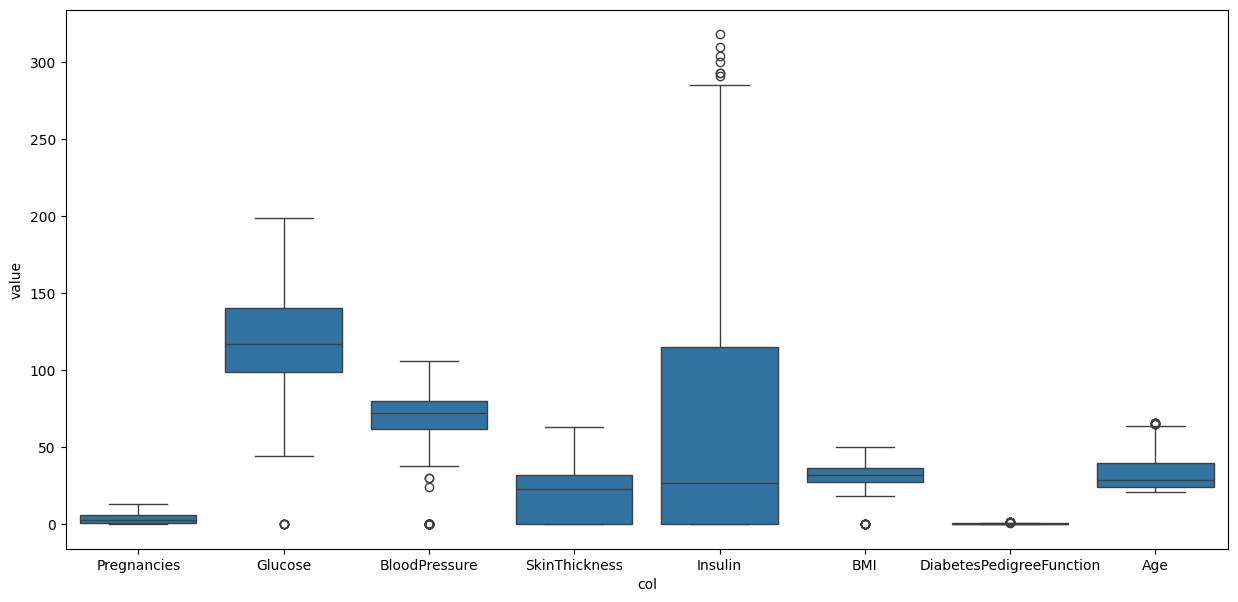

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(x='col', y='value', data=df_v1)
plt.show()